In [38]:
import matplotlib.pyplot as plt
import matplotlib as mpl 
mpl.rc('font',family='Malgun Gothic')
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
df_I10 = pd.read_csv('../../../dataset/Join Collection NSC2_BND_M20.csv')

In [3]:
df_I10.isnull().sum()
#df_I10= df_I10.dropna()

Unnamed: 0           0
ED_RC_TOT_AMT        0
MCARE_SUBJ_CD        0
OPRTN_YN             0
MCARE_RSLT_TYPE    424
EDC_SBA              0
BTH_YYYY             0
dtype: int64

## 목표변수 검증

### Y:연속형 : 단일 변수에 대한 정규성 여부 판단
- 검증 갯수 따른 방법 선택 (레코드 갯수)
    - 5천개보다 이하 : shapiro normality test
    - 5천개보다 이상 : Anderson normality test

### 목적변수 : ED_RC_TOT_AMT(심결요양급여비용총액)
- 분석 내용 : 심결요양급여비용총액이 정규 분포를 따르는가?
    - 귀무가설 : 정규 분포이다.
    - 대립가설 : 정규 분포가 아니다.
- 분석결론 (기준:p-value 0.05) / P.value < 0.05 : 대립 참
    - 통계 결론 : pvalue=0.0이므로 대립가설 참 
    - 사실 결론 : 심결요양급여비용총액이 정규 분포가 아니다.

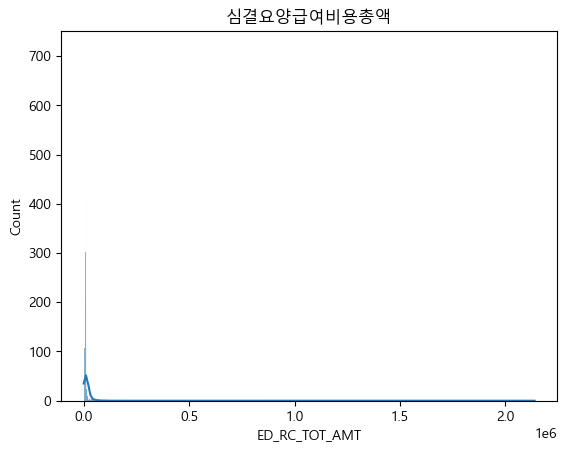

In [4]:
sns.histplot(data=df_I10, x='ED_RC_TOT_AMT', kde=True)
plt.title("심결요양급여비용총액")
plt.show()

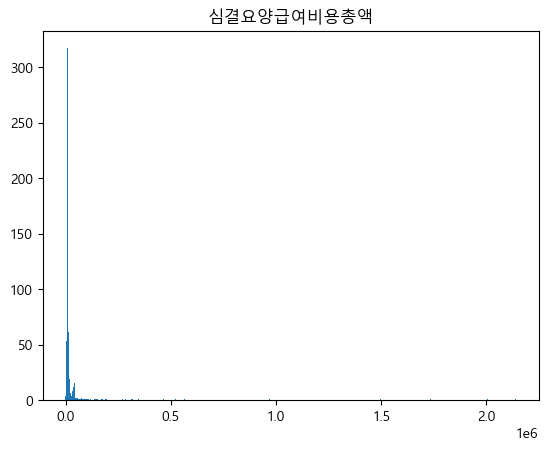

In [5]:
# y축의 값을 지정하기 위해 데이터의 빈도수 계산
value_counts = df_I10['ED_RC_TOT_AMT'].value_counts()
plt.bar(value_counts.index, value_counts.values, width=5000)  # 막대의 너비는 임의로 설정
plt.title("심결요양급여비용총액")
plt.show()

In [6]:
df_I10['ED_RC_TOT_AMT'].count()

4629

In [7]:
stats.shapiro(df_I10['ED_RC_TOT_AMT'])

## pvalue=0.0 --> 0.05이하로 대립가설참 

ShapiroResult(statistic=0.07707524299621582, pvalue=0.0)

### 설명변수 검증 
- 'EDC_SBA'(심결본인부담금),'BTH_YYYY'(출생년도)

### X:연속형 / Y:연속형 : 주로 상관관계 확인 
- correlation coefficient(상관계수)
    - -1 ~ 1  
    - 0에 가까우면 관계없음, -1로 갈수록 반비례, 1로 갈수로 정비례

In [8]:
df_I10['EDC_SBA'].value_counts()

1500     1483
3000      945
500       284
3100      195
2900      173
         ... 
25240       1
20500       1
10700       1
7000        1
25200       1
Name: EDC_SBA, Length: 380, dtype: int64

In [9]:
df_I10_select = df_I10[['ED_RC_TOT_AMT','EDC_SBA','BTH_YYYY']]

#### 선정 변수: 심결요양급여비용총액, 심결본인부담금
- 분석 내용 : 심결본인부담금에 따라서 심결요양급여비용총액에 변화가 있는가?
    - 귀무가설 : 심결요양급여비용총액에 변화가 없다.
    - 대립가설 : 심결요양급여비용총액에 변화가 있다.
- 분석결론 (기준:p-value 0.05) / P.value < 0.05 : 대립 참
    - 통계 결론 : 대립가설 참, 상관계수 비례관계   
    - 사실 결론 : 심결요양급여비용총액에 변화가 있다.(statistic=0.60, pvalue=0.0)

In [10]:
df_I10_select[['ED_RC_TOT_AMT','EDC_SBA']].corr()

## 0.96으로 상관관계가 비례관계 

,ED_RC_TOT_AMT,EDC_SBA
ED_RC_TOT_AMT,1.000000,0.962641
EDC_SBA,0.962641,1.000000


In [11]:
stats.spearmanr(df_I10_select['ED_RC_TOT_AMT'], df_I10_select['EDC_SBA'])

##  statistic=0.60, pvalue=0.0 --> 0.05보다 작음 대립가설 참 

SignificanceResult(statistic=0.606203269337706, pvalue=0.0)

#### 선정 변수: 심결요양급여비용총액, 출생년도
- 분석 내용 : 연령(출생년도)에 따라서 심결요양급여비용총액에 변화가 있는가?
    - 귀무가설 : 심결요양급여비용총액에 변화가 없다.
    - 대립가설 : 심결요양급여비용총액에 변화가 있다.
- 분석결론 (기준:p-value 0.05) / P.value < 0.05 : 대립 참
    - 통계 결론 : 귀무가설 참, 상관계수 관계없음   
    - 사실 결론 : 심결요양급여비용총액에 변화가 없다.(statistic=0.0206, pvalue=0.160)

In [36]:
df_I10['BTH_YYYY'] 
# 해당 value값 확인함에 따라 'LE'를 제외하고 추출해야함을 판단함. 

0       1921LE
1       1921LE
2       1921LE
3       1921LE
4       1921LE
         ...  
4624      2005
4625      2005
4626      2005
4627      2005
4628      2005
Name: BTH_YYYY, Length: 4629, dtype: object

In [13]:
df_I10['BTH_YYYY_onlyyear'] = df_I10['BTH_YYYY'].str[:4] #slicing

In [15]:
df_I10['BTH_YYYY_onlyyear'] = df_I10['BTH_YYYY_onlyyear'].astype(int) # int로 데이터 변환 

In [16]:
#apply() 적용 
def age (BTH) :
    result = 2023 - BTH
    return result 

In [17]:
df_I10['연령(2023년기준)']= df_I10['BTH_YYYY_onlyyear'].apply(age)
df_I10['연령(2023년기준)'][:2]

0    102
1    102
Name: 연령(2023년기준), dtype: int64

In [35]:
df_I10[['ED_RC_TOT_AMT','연령(2023년기준)']].corr()
## 상관계수는 관련없음 

,ED_RC_TOT_AMT,연령(2023년기준)
ED_RC_TOT_AMT,1.00000,-0.00225
연령(2023년기준),-0.00225,1.00000


In [37]:
stats.spearmanr(df_I10['ED_RC_TOT_AMT'], df_I10['연령(2023년기준)'])

## pvalue=0.160 --> 0.05보다 큼, 귀무가설 참

SignificanceResult(statistic=0.020614568227278876, pvalue=0.16082014639377587)

##### 1910년대 이후인 사람 제외 

In [27]:
df_I10_filtered = df_I10[df_I10['BTH_YYYY'] != 'le']

In [28]:
df_I10_filtered['BTH_YYYY'] 

0       1921LE
1       1921LE
2       1921LE
3       1921LE
4       1921LE
         ...  
4624      2005
4625      2005
4626      2005
4627      2005
4628      2005
Name: BTH_YYYY, Length: 4629, dtype: object